# Manipulate an image with OpenCV

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

classe : <class 'numpy.ndarray'>
type : uint8
taille (404, 696, 3)


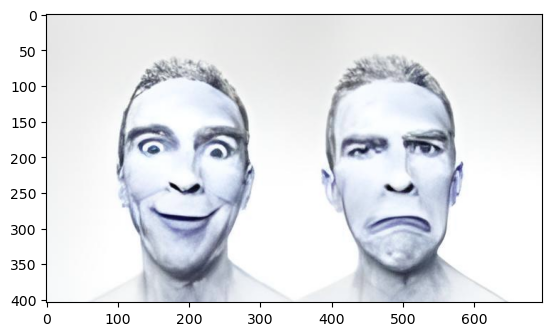

In [2]:
#1.1. Import an image

image = cv2.imread('test.jpg')
#informations
print('classe :',type(image))
print('type :',image.dtype)
print('taille', image.shape)

plt.imshow(image)
plt.show()

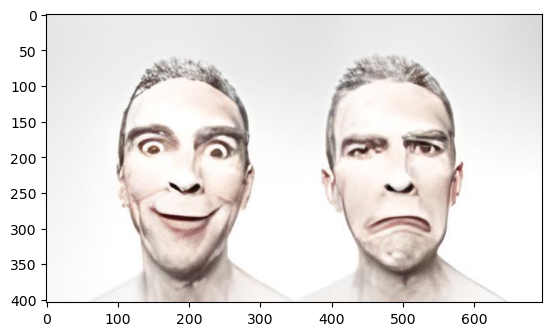

True

In [3]:
#reorganizing the image to be in RGB instead of being in BGR

b, g, r = cv2.split(image)
image = cv2.merge([r,g,b])
plt.imshow(image)
plt.show()
cv2.imwrite('C:/Users/ADM-P2022/Computer-Vision/TD1/visages.png', image)

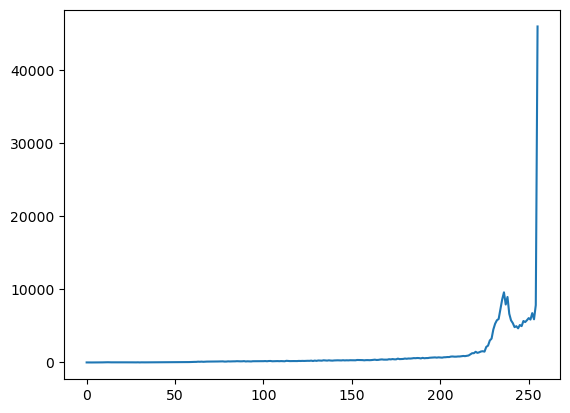

In [4]:
#1.2. Pixel histogram

hist_image = cv2.calcHist([image], [1],None,[256], [0,256])
plt.plot(hist_image)
plt.show()

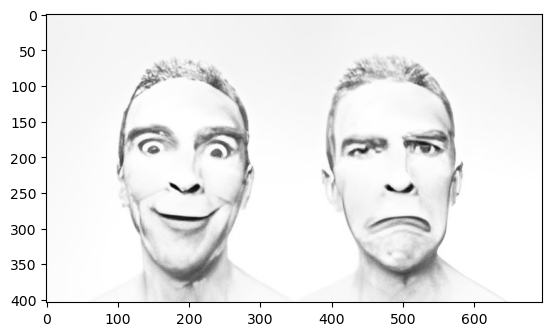

taille de l'image en nuance de gris: (404, 696)


In [5]:
#1.3. grayscale image

grey_image = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
plt.imshow(grey_image, cmap='Greys_r')
plt.show()
print("taille de l'image en nuance de gris:", grey_image.shape)

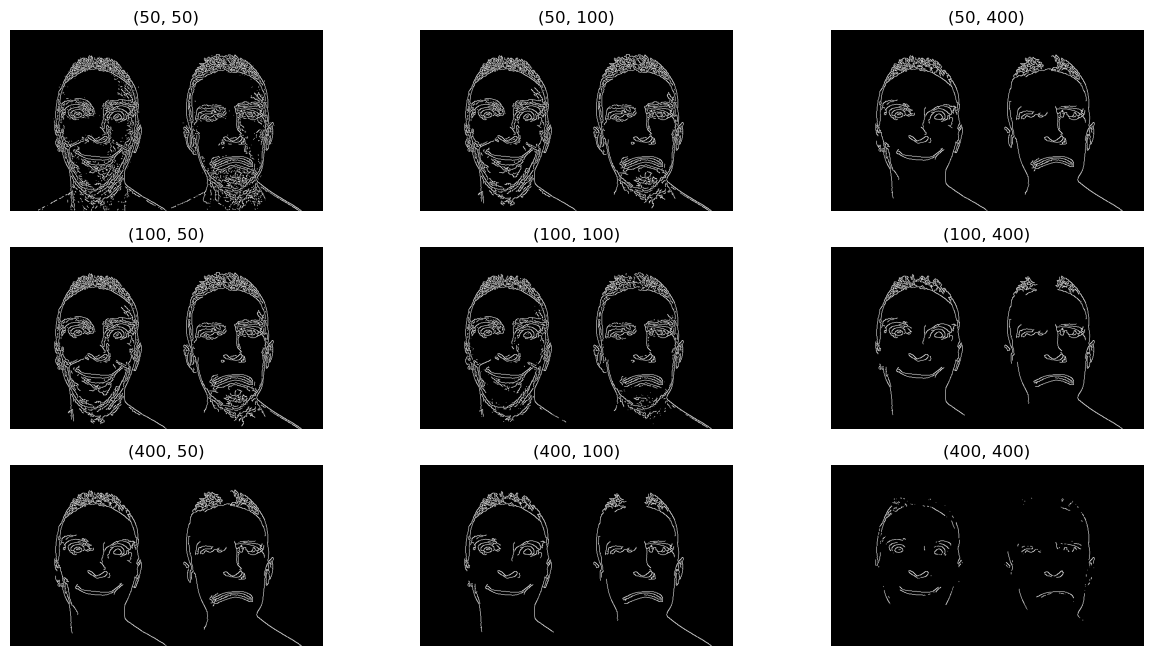

In [6]:
#1.4. Edge detection

fig, axs = plt.subplots(nrows = 3, ncols=3,figsize=(15,8))
#liste des valeurs
Val1 = [50,100,400]
Val2 = [50,100,400]
for i, val1 in enumerate(Val1):
    for j, val2 in enumerate(Val2):
        edge_image = cv2.Canny(image, val1, val2)
        axs[i][j].imshow(edge_image, cmap = 'Greys_r')
        axs[i][j].set_title((val1, val2))
        axs[i][j].set_axis_off()

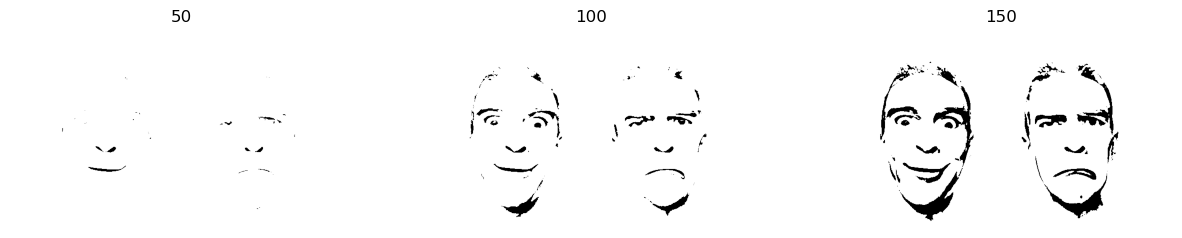

In [7]:
#1.5. Segmentation
fig, axs = plt.subplots(nrows = 1, ncols=3,figsize=(15,8))
#Transform the picture into a grey one
grey_image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

thresholds = [50,100,150]

for i, thresholds in enumerate(thresholds):
    val, seg_image = cv2.threshold(grey_image, thresholds, 255, cv2.THRESH_BINARY)
    axs[i].imshow(seg_image, cmap = 'Greys_r')
    axs[i].set_title(thresholds)
    axs[i].set_axis_off()

In [8]:
#2. object detection
haar_file = 'haarcascade_frontalface_alt.xml'
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + haar_file)

grey_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
faces = face_cascade.detectMultiScale(grey_image)
print("Nombre de visages détecté dans l'image : {0}".format(len(faces)))

Nombre de visages détecté dans l'image : 2


[83, 97, 224, 224]


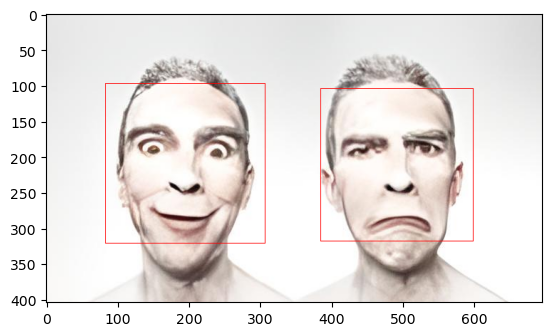

In [9]:
position_list = faces.tolist()
print(position_list[0])
for(x,y,w,h)in position_list:
    cv2.rectangle(image,(x,y), (x+w,y+h), color=255)
    plt.imshow(image)
    plt.show

In [10]:
cv2.imwrite('C:/Users/ADM-P2022/Computer-Vision/TD1/visages.jpg',image)

True

E:\Ecole\anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


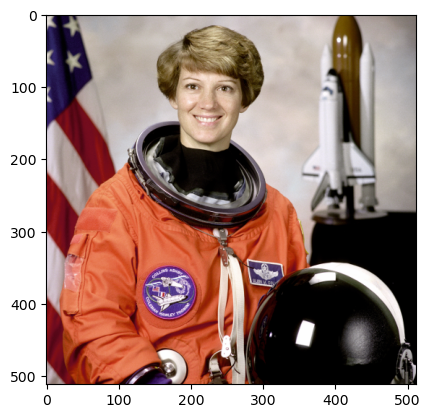

In [11]:
#3. exercise 
from skimage import data
import matplotlib.pyplot as plt
import numpy as np
image = data.astronaut()
plt.imshow(image)
plt.show()

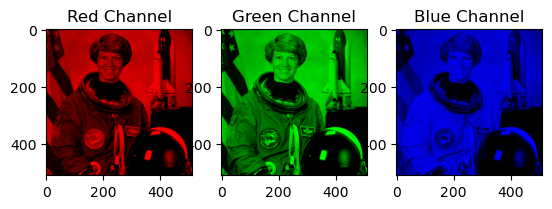

In [12]:
# Splitting the image into different color channels
b, g, r = cv2.split(image)

red_channel = cv2.merge([r, g * 0, b * 0])
green_channel = cv2.merge([r * 0, g, b * 0])
blue_channel = cv2.merge([r * 0 , g * 0, b ])

# Display the three different channels
plt.subplot(131)
plt.imshow(red_channel)
plt.title('Red Channel')

plt.subplot(132)
plt.imshow(green_channel)
plt.title('Green Channel')

plt.subplot(133)
plt.imshow(blue_channel)
plt.title('Blue Channel')

plt.show()

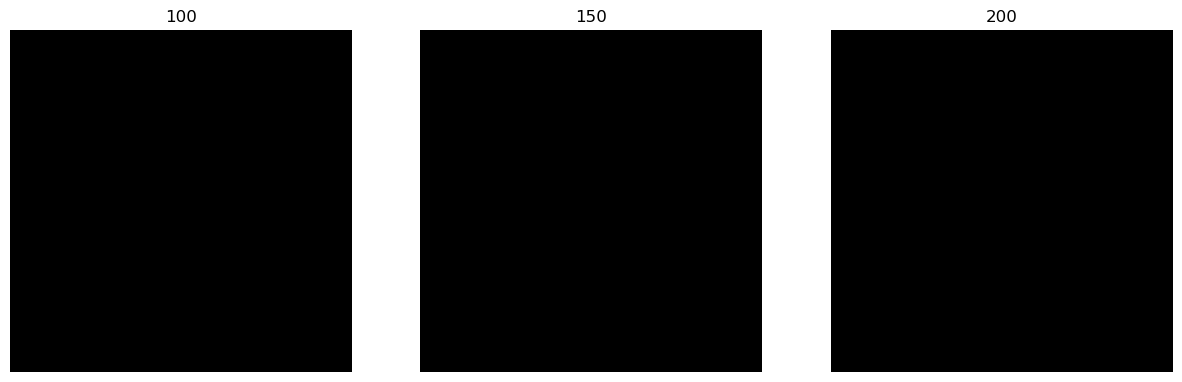

In [13]:
#segmentation for the red channel :
grey_image = cv2.cvtColor(red_channel, cv2.COLOR_BGR2GRAY)

seuil = [100, 150, 200]

fig, axs = plt.subplots(1, 3, figsize=(15, 8))

for i, seuil in enumerate(seuil):
    val, seg_image = cv2.threshold(grey_image, seuil, 255, cv2.THRESH_BINARY)

    axs[i].imshow(seg_image, cmap='Greys_r')

    axs[i].set_title(seuil)
    axs[i].set_axis_off()


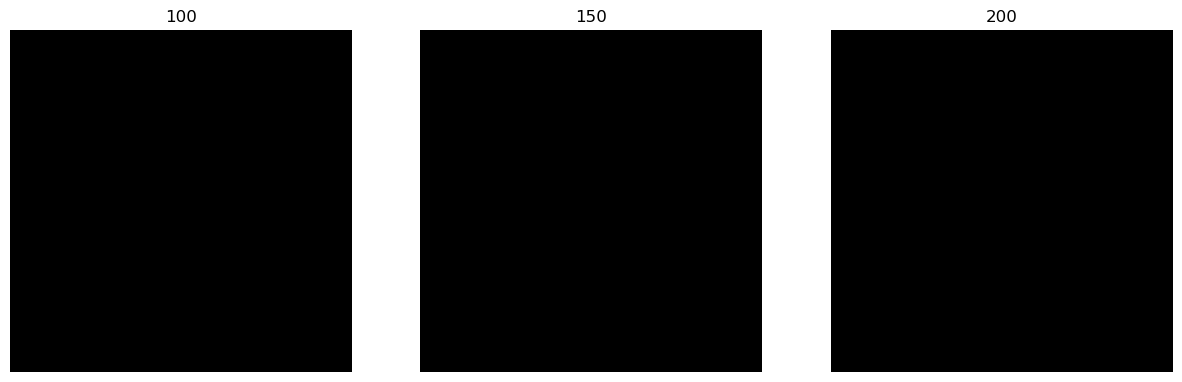

In [14]:
#segmentation for the blue channel :
grey_image = cv2.cvtColor(blue_channel, cv2.COLOR_BGR2GRAY)

seuil = [100, 150, 200]

fig, axs = plt.subplots(1, 3, figsize=(15, 8))

for i, seuil in enumerate(seuil):
    val, seg_image = cv2.threshold(grey_image, seuil, 255, cv2.THRESH_BINARY)

    axs[i].imshow(seg_image, cmap='Greys_r')

    axs[i].set_title(seuil)
    axs[i].set_axis_off()


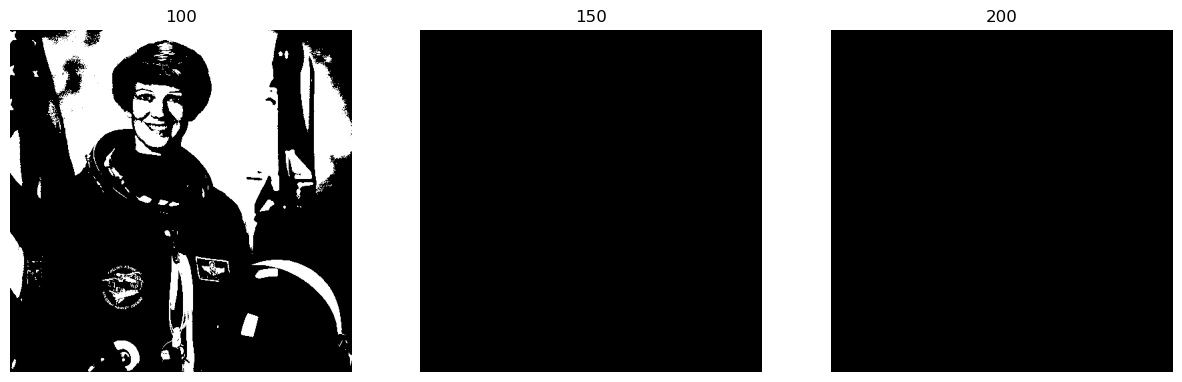

In [15]:
#segmentation for the green one:
grey_image = cv2.cvtColor(green_channel, cv2.COLOR_BGR2GRAY)

seuil = [100, 150, 200]

fig, axs = plt.subplots(1, 3, figsize=(15, 8))

for i, seuil in enumerate(seuil):
    val, seg_image = cv2.threshold(grey_image, seuil, 255, cv2.THRESH_BINARY)

    axs[i].imshow(seg_image, cmap='Greys_r')

    axs[i].set_title(seuil)
    axs[i].set_axis_off()



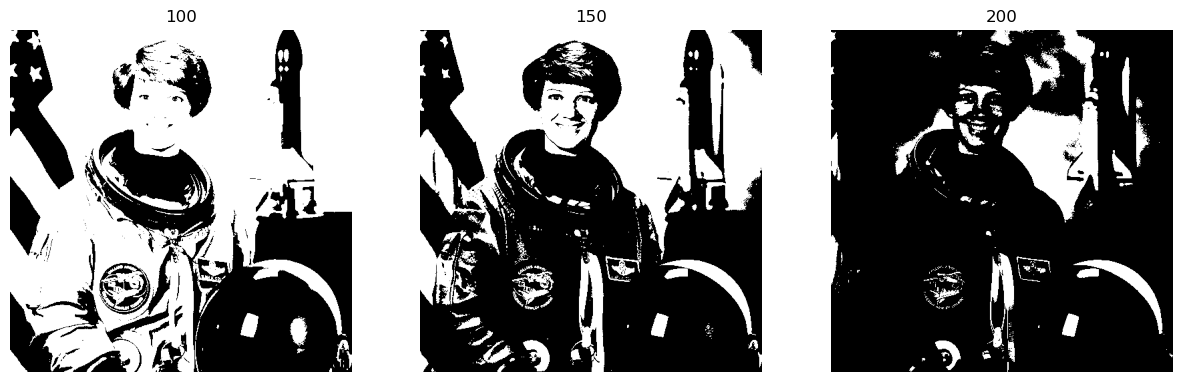

In [16]:
b, g, r = cv2.split(image)
image = cv2.merge([r,g,b])

#i also did one for the original image 

grey_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
seuil = [100, 150, 200]
fig, axs = plt.subplots(1, 3, figsize=(15, 8))
for i, seuil in enumerate(seuil):
    val, seg_image = cv2.threshold(grey_image, seuil, 255, cv2.THRESH_BINARY)
    axs[i].imshow(seg_image, cmap='Greys_r')
    axs[i].set_title(seuil)
    axs[i].set_axis_off()

In [17]:
#2. object detection
haar_file = 'haarcascade_eye_tree_eyeglasses.xml'
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + haar_file)
eyes = eye_cascade.detectMultiScale(image)
print("Nombre d'oeils détectés dans l'image : {0}".format(len(faces)))

Nombre d'oeils détectés dans l'image : 2


In [18]:
image = data.astronaut()

[191, 89, 24, 24]


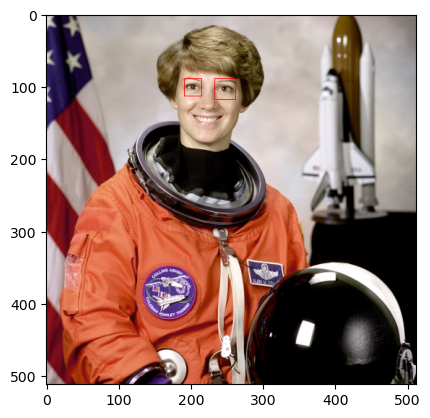

In [19]:
position_list = eyes.tolist()
print(position_list[0])
for(x,y,w,h)in position_list:
    cv2.rectangle(image,(x,y), (x+w,y+h), color=255)
    plt.imshow(image)
    plt.show